## Introduction

As a first look at this Kaggle dataset, I want to explore survey participation and seek to summarize some of properties of the participant cities.

Some initial questions to frame my analysis:
- How has survey participation changed between 2018 and 2020? 
- What does meta-analysis tell us about ways in which we can leverage the survey results?


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# loading dataframe
data_root_dir = '../input/cdp-unlocking-climate-solutions'
data_cities_dir = data_root_dir + '\cities\cities responses\\'

def rename_mapper(index_label):
    return str.lower(index_label).replace(' ','_')

df_disc_2018 = pd.read_csv(data_root_dir + '/Cities/Cities Disclosing/2018_Cities_Disclosing_to_CDP.csv')
df_disc_2019 = pd.read_csv(data_root_dir + '/Cities/Cities Disclosing/2019_Cities_Disclosing_to_CDP.csv')
df_disc_2020 = pd.read_csv(data_root_dir + '/Cities/Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv')

df_response = pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2019_Full_Cities_Dataset.csv')

df_disc_2018['year'] = 2018
df_disc_2019['year'] = 2019
df_disc_2020['year'] = 2020

df_disc_2018.rename(columns=rename_mapper,inplace=True)
df_disc_2019.rename(columns=rename_mapper,inplace=True)
df_disc_2020.rename(columns=rename_mapper,inplace=True)
df_response.rename(columns=rename_mapper,inplace=True)

df_disc = pd.concat([df_disc_2018,df_disc_2019,df_disc_2020])

## Survey Participation 

I'm interested in knowing ways in which survey participation changed each year, such as:
- How many cities participated only one of the survey years?
- How many cities participated every single survey year (in this dataset)
- What is the city partipation count by region?

By knowing how and why the survey participation improved (or didn't improve) each year, we can begin to understand how to improve participation going forward. The charts below may indicate good starting points for that analysis.

Text(0, 0.5, '# Cities')

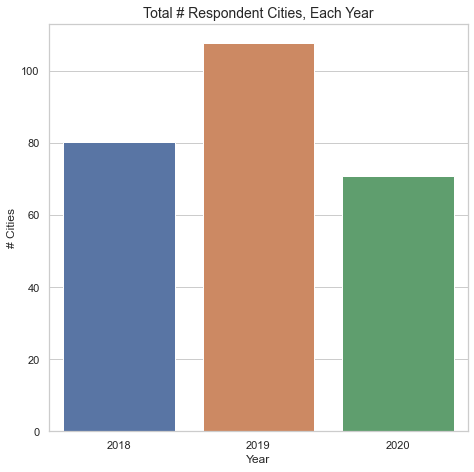

In [5]:
df_tmp = df_disc.groupby(['cdp_region','year'],as_index=False).size()

sns.set_theme(style='whitegrid')
plt.figure(figsize=(7.5,7.5))

graph = sns.barplot(
    data=df_tmp,
    x='year', 
    y='size',
    palette='deep',
    ci=None
    ).set_title(
        'Total # Respondent Cities, Each Year'
        , size=14
    )

plt.xlabel('Year')
plt.ylabel('# Cities')

Unfortunately - 2020 had the lowest participation count out of all three survey years. It would be interesting to know if the COVID pandemic had any impact on survey participation.

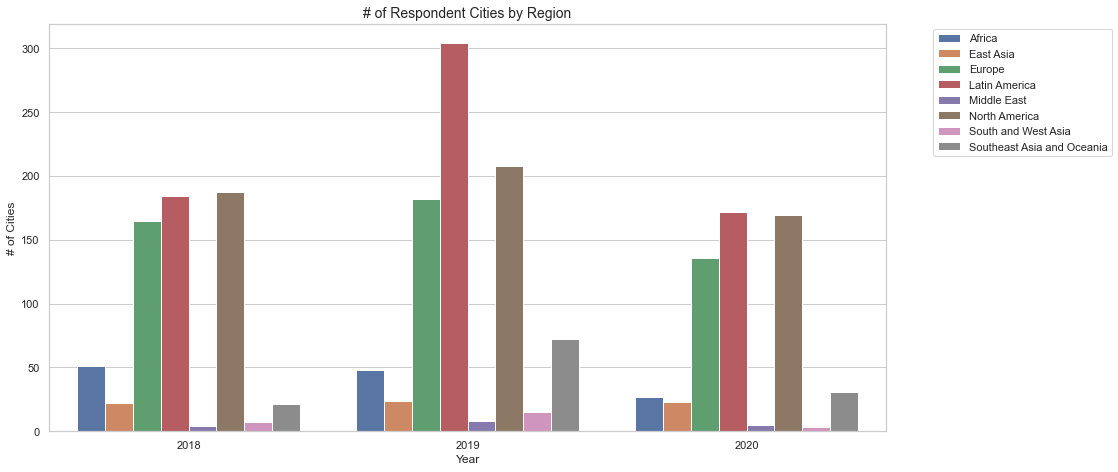

In [6]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(15,7.5))
graph = sns.barplot(
    data=df_tmp,
    x='year', 
    y='size', 
    hue='cdp_region',
     palette='deep'
     ).set_title(
    '# of Respondent Cities by Region',
    size=14
    )
plt.xlabel('Year')
plt.ylabel('# of Cities')


# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

It may be worth noting that the Latin American region had a surge of participation in 2019. Other regions don't seem to have as significant of a participation change between the survey years.

Text(0.5, 1.0, 'Survey Participation, Years Participating')

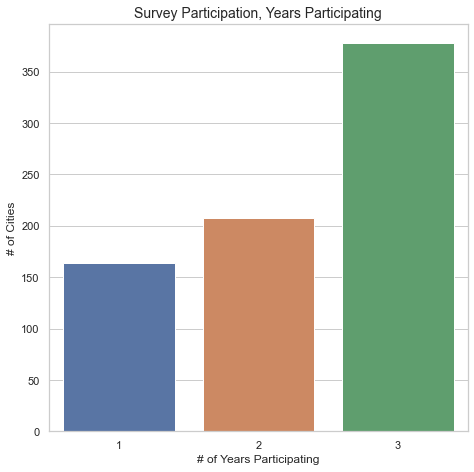

In [7]:
df_tmp = df_disc
df_tmp = df_tmp[['city','year']]
df_tmp = df_tmp.groupby('city',as_index=False).nunique()

df_tmp = df_tmp.groupby('year',as_index=False).size()

plt.figure(figsize=(7.5,7.5))
sns.barplot(data=df_tmp,x='year',y='size')
plt.xlabel('# of Year''s Participating')
plt.ylabel('# of Cities')
plt.title('Survey Participation, Years Participating',size=14)

It seems encouraging that a plurality of cities participated for 3 straight years. 

If the CDP is aiming to expand the scope of participation each year, it could be a point of interest to understand why particular cities participated for *less* than 3 straight years.  However - perhaps it's not critical for cities to participate every single year, as cities could be providing redundant information.

## Question Meta-Analysis

  - Which questions have a limited number of responses? 
  - Which questions have many responses?
  - Which questions have a high count of numeric responses?

In [32]:
df_tmp = df_response

df_tmp = df_tmp.assign(is_response_notnull = np.where(~(df_tmp.response_answer.isna()),1,0))
df_tmp = df_tmp.assign(is_response_numeric = np.where(df_tmp.response_answer.str.isnumeric(),1,0))

df_tmp = df_tmp.groupby('parent_section',as_index=False).agg(
    count_values = pd.NamedAgg('is_response_notnull','sum'),
    count_numeric = pd.NamedAgg('is_response_numeric','sum'),
    count_total = pd.NamedAgg('response_answer','size')
)

df_tmp = df_tmp.assign(perc_numeric = ["{:.2%}".format(val) for val in round(df_tmp.count_numeric/df_tmp.count_total,4)])
df_tmp = df_tmp.assign(perc_values = ["{:.2%}".format(val) for val in round(df_tmp.count_values/df_tmp.count_total,4)])

df_tmp.sort_values(by='count_values',ascending=False)

,parent_section,count_values,count_numeric,count_total,perc_numeric,perc_values
2,Climate Hazards & Vulnerability,78062,10644,88063,12.09%,88.64%
3,Emissions Reduction,65411,42146,99705,42.27%,65.60%
0,Adaptation,42408,22972,61597,37.29%,68.85%
1,City Wide Emissions,38566,68082,97145,70.08%,39.70%
6,Local Government Emissions,14272,6568,18511,35.48%,77.10%
7,Opportunities,14123,7722,20440,37.78%,69.09%
8,Water Security,13578,3675,16498,22.28%,82.30%
4,Governance and Data Management,9650,1791,11211,15.98%,86.08%
5,Introduction,7433,4756,8140,58.43%,91.31%


## Next Steps

- Look in detail at: 
    - The cities participating in 2019 that *did not* participate in 2020
    - The cities participating in 2020 that *did* participate in 2019
- Does either category have distinguishing properties?
- What are the cities that *aren't* participating? See if it's possible to get a list of the cities not participating above a particular population threshold
- Perform survey participation analysis for *corporations*
